In [1]:
import os, sys
sys.path.append(os.getcwd()+"/..")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
os.getcwd()

'c:\\Users\\benja\\OneDrive - ETHZ\\PhD\\Code\\ensembler_riniker_develop\\examples'

In [2]:
import ensembler.potentials.OneD as pot
import ensembler.system as system
import ensembler.ensemble.replicas_dynamic_parameters as cvb
import ensembler.integrator as integ


# Interactive Example 

In [3]:
from ensembler.visualisation.interactive_plots import interactive_conveyor_belt

iwidget = interactive_conveyor_belt(nbins=100)

ModuleNotFoundError: No module named 'ensember'

# BUILD Conveyor Belt

In [5]:
numsys = 8
steps = 1000

integrat = integ.metropolisMonteCarloIntegrator()
potial = pot.pertHarmonicOsc(fc=1.0, alpha=10.0, gamma=0.0)
syst = system.perturbedSystem(potential=potial , integrator=integrat)

In [6]:
ens=cvb.ConveyorBelt(0.0, numsys, system=syst, build=False)


In [7]:
ens.run()
ens.accept_move()
ens

{0: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B63C148>, 1: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B63CC08>, 2: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B63C788>, 3: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B63C688>, 4: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B63C308>, 5: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B635F88>, 6: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B635CC8>, 7: <ensembler.system.perturbed_system.perturbedSystem object at 0x000001FB7B635888>}


0.0      0.11    34.971
1.0      0.36    57.963
2.0      0.61   106.140
3.0      0.86   167.295
4.0      0.89   178.155
5.0      0.64    93.194
6.0      0.39    87.551
7.0      0.14    32.130

In [8]:
#ens.traj_clear()
ens.simulate(steps)
print(ens.reject)


475


In [9]:
(cvb_traj, systrajs) = ens.get_trajs()

In [10]:
systrajs[0].head()

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity,lam,dhdlam
0,[[5.741230915079839]],298.0,16.4809,16.4809,NaN,NaN,[0.23132901835678943],0.000000,[1648.0866210134245]
1,[[5.74534839884792]],298.0,[34.970880841825924],[34.970880841825924],NaN,0.004117,None,0.111887,[1650.451411207218]
2,[[5.491839328035518]],298.0,[31.95284097696972],[31.95284097696972],NaN,-0.253509,None,0.111887,[1508.0149602478807]
3,[[5.8226834930352105]],298.0,[50.2919962968743],[50.2919962968743],NaN,0.330844,None,0.196676,[1695.182153003236]
4,[[5.429714987906847]],298.0,[34.10588300319913],[34.10588300319913],NaN,-0.392969,None,0.131369,[1474.0902424950127]


In [11]:
# old: traj=pd.DataFrame(traj, columns=['Step', 'CapLam', 'Energy', 'Bias'])
cvb_traj.head()

,Step,capital_lambda,TotE,biasE,doAccept
0,1,0.351503,757.399204,757.399204,True
1,2,0.351503,620.420244,0.000000,False
2,3,0.617876,556.013230,556.013230,True
3,4,0.412708,463.347388,463.347388,True
4,5,0.412708,353.890734,0.000000,False


# Plot Simulation

In [12]:
nbins=100
bins=np.zeros(nbins)
dhdlbins=np.zeros(nbins)
for i in systrajs:
    for j in range(systrajs[i].shape[0]):
        index=int(np.floor(systrajs[i].lam[j]*nbins))
        if index == nbins:
            index=nbins-1
        bins[index]+=1
        dhdlbins[index]+=systrajs[i].dhdlam[j]
dhdlbins/=bins
#dhdlbins

Integral =  33.36530933197444


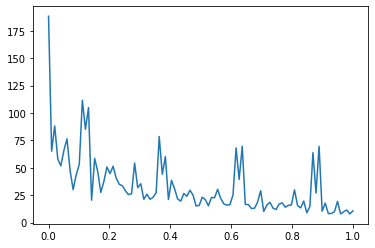

In [13]:
plt.plot(np.linspace(0,1,nbins), dhdlbins)
integral=np.sum(dhdlbins)*1.0/nbins
print('Integral = ', integral)

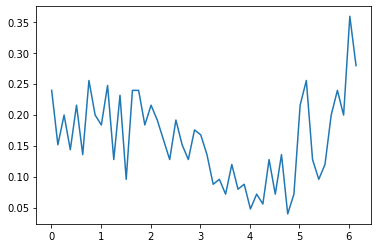

In [14]:
h1=np.histogram(cvb_traj.capital_lambda, bins=50, density=1)
plt.plot(h1[1][:-1], h1[0])
#plt.ylim(0.14, 0.185)

Text(0, 0.5, '$\\lambda$')

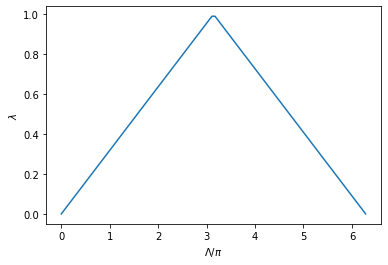

In [15]:
caplam = np.linspace(0, 2*np.pi, 100)
x=[]
for i in caplam:
    x.append(ens.calc_lam(i, 0))
plt.plot(caplam, x)
plt.xlabel('$\Lambda / \pi$')
plt.ylabel('$\lambda$')

In [16]:
#analytical
u=1.66053886e-27
NA=6.0221415e23
hbar=1.054571800e-34*1e12*1e-3*NA  #kJ/mol*ps
R=0.00831446 #kJ/mol/K
mu=0.5  #u
T=300.0  #K
fc1=1  #kJ/nm^2/mol
fc2=11.0 #kJ/nm^2/mol
omega1=np.sqrt(fc1/mu)
omega2=np.sqrt(fc2/mu)
print('Omega', omega1, omega2)
alpha1=hbar*np.sqrt(fc1/mu)/(R*T)
alpha2=hbar*np.sqrt(fc2/mu)/(R*T)
print(alpha1, alpha2)
Z1=np.exp(-alpha1/2.0)/(1-np.exp(-alpha1))
Z2=np.exp(-alpha2/2.0)/(1-np.exp(-alpha2))
F1=-R*T*np.log(Z1)
F2=-R*T*np.log(Z2)
DF=F2-F1
DF2=-R*T*np.log(Z2/Z1)
print(DF, DF2, F1, F2)

Omega 1.4142135623730951 4.69041575982343
0.03600698886161772 0.11942167188449208
2.991927940369414 2.991927940369415 -8.291150088634001 -5.299222148264588


# Conveyor Belt Animation

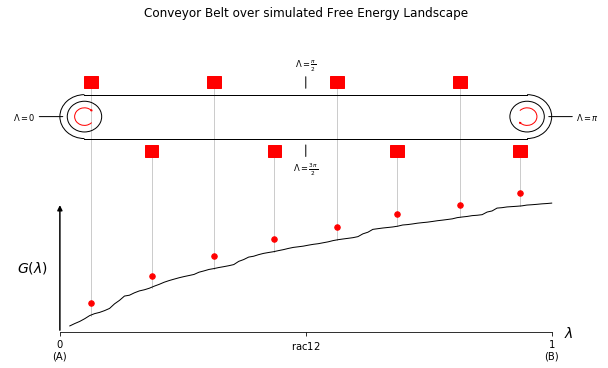

In [18]:
import ensembler.visualisation.plotConveyorBelt as plotEnsembler

lam = np.linspace(0, 1, nbins)
ene = np.cumsum(dhdlbins)/nbins

fig = plotEnsembler.drawEnsembler(lam, ene, CapLam=0.2, M=8)